# **BigMart project**

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition

In [2]:
train_df=pd.read_csv('Train.csv')
test_df= pd.read_csv('Test.csv')

# shape of them
print (f'Train dataset shape is : {train_df.shape} \n')
print (f'Test dataset shape is : {test_df.shape}')

Train dataset shape is : (8523, 12) 

Test dataset shape is : (5681, 11)


## Data Wrangling

In [3]:
df=train_df.copy()

In [4]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [5]:
def data_summary(df):
  summary= []
  for column in df.columns :
    column_info= {}
    column_value= df[column]
    column_info['Column name']= column
    column_info['Data Type']= column_value.dtype
    column_info['Null values']= column_value.isna().sum()
    column_info['Unique']= column_value.unique()
    column_info['Number of Unique']= column_value.nunique()
    summary.append(column_info)

  return pd.DataFrame(summary)


data_summary(df)

,Column name,Data Type,Null values,Unique,Number of Unique
0,Item_Identifier,object,0,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559
1,Item_Weight,float64,1463,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, n...",415
2,Item_Fat_Content,object,0,"[Low Fat, Regular, low fat, LF, reg]",5
3,Item_Visibility,float64,0,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880
4,Item_Type,object,0,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16
5,Item_MRP,float64,0,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938
6,Outlet_Identifier,object,0,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10
7,Outlet_Establishment_Year,int64,0,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9
8,Outlet_Size,object,2410,"[Medium, nan, High, Small]",3
9,Outlet_Location_Type,object,0,"[Tier 1, Tier 3, Tier 2]",3


In [6]:
print(f'Columns of Training data set is: \n \n {df.columns} \n \n ')
print(f'Columns of Testing data set is: \n \n {test_df.columns}')

Columns of Training data set is: 
 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 
 
 
Columns of Testing data set is: 
 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Dealing With null values**

In [8]:
print(df.isna().sum().sum())
print(df.isna().sum())

3873
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- in the data we have tottal number of null values is : 3873
- the columns contain null is two columns

* **IN ORDER TO DEAL WITH THE MISSING VALUES**
- Mean for the Item_Weight
- and Mode for the Outlet_size


In [9]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())
test_df['Item_Weight']= test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean())


In [12]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# information about the Outlet_size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# Mode value for the column
df['Outlet_Type'].mode()

0    Supermarket Type1
Name: Outlet_Type, dtype: object

In [15]:
# mode of outlet
mode_of_Outlet_size_train = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size_test= test_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
mode_of_Outlet_size_train

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
# add missing values in the new dataframe
miss_values_train = df['Outlet_Size'].isnull()
miss_values_test = test_df['Outlet_Size'].isnull()


In [18]:
# Fill missing values in the miss_values with the mode_of_outlet_size
df.loc[miss_values_train, 'Outlet_Size'] = df.loc[miss_values_train,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_train[x])
test_df.loc[miss_values_test, 'Outlet_Size'] = test_df.loc[miss_values_test,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size_test[x])


In [19]:
# Check
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
test_df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)


In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
data_summary(df)

,Column name,Data Type,Null values,Unique,Number of Unique
0,Item_Identifier,object,0,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559
1,Item_Weight,float64,0,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",416
2,Item_Fat_Content,object,0,"[Low Fat, Regular]",2
3,Item_Visibility,float64,0,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880
4,Item_Type,object,0,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16
5,Item_MRP,float64,0,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938
6,Outlet_Identifier,object,0,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10
7,Outlet_Establishment_Year,int64,0,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9
8,Outlet_Size,object,0,"[Medium, Small, High]",3
9,Outlet_Location_Type,object,0,"[Tier 1, Tier 3, Tier 2]",3


In [26]:
categorical_column= df[['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']]
categorical_column.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [27]:
data_summary(categorical_column)

,Column name,Data Type,Null values,Unique,Number of Unique
0,Item_Fat_Content,object,0,"[Low Fat, Regular]",2
1,Item_Type,object,0,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16
2,Outlet_Identifier,object,0,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10
3,Outlet_Size,object,0,"[Medium, Small, High]",3
4,Outlet_Location_Type,object,0,"[Tier 1, Tier 3, Tier 2]",3
5,Outlet_Type,object,0,"[Supermarket Type1, Supermarket Type2, Grocery...",4


# **Exploratory Data Analysis (EDA)**

### info about data

In [28]:
# Describe for the data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
data_summary(df)

,Column name,Data Type,Null values,Unique,Number of Unique
0,Item_Identifier,object,0,"[FDA15, DRC01, FDN15, FDX07, NCD19, FDP36, FDO...",1559
1,Item_Weight,float64,0,"[9.3, 5.92, 17.5, 19.2, 8.93, 10.395, 13.65, 1...",416
2,Item_Fat_Content,object,0,"[Low Fat, Regular]",2
3,Item_Visibility,float64,0,"[0.016047301, 0.019278216, 0.016760075, 0.0, 0...",7880
4,Item_Type,object,0,"[Dairy, Soft Drinks, Meat, Fruits and Vegetabl...",16
5,Item_MRP,float64,0,"[249.8092, 48.2692, 141.618, 182.095, 53.8614,...",5938
6,Outlet_Identifier,object,0,"[OUT049, OUT018, OUT010, OUT013, OUT027, OUT04...",10
7,Outlet_Establishment_Year,int64,0,"[1999, 2009, 1998, 1987, 1985, 2002, 2007, 199...",9
8,Outlet_Size,object,0,"[Medium, Small, High]",3
9,Outlet_Location_Type,object,0,"[Tier 1, Tier 3, Tier 2]",3


### 1. What is the overall distribution of sales in the dataset?


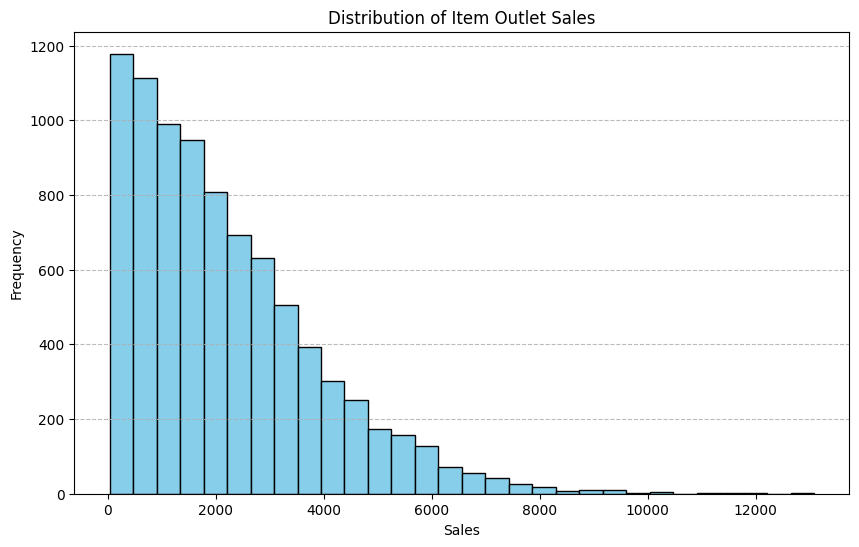

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['Item_Outlet_Sales'], bins=30, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.85)

plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.show()


### 2. What is the average item weight across all products?

In [31]:
average_item_weight = df['Item_Weight'].mean()

# Print the result
print(f"The average item weight across all products is {average_item_weight:.2f}")


The average item weight across all products is 12.86


### 3. What is the distribution of item fat content categories?


fat content counts is: 
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


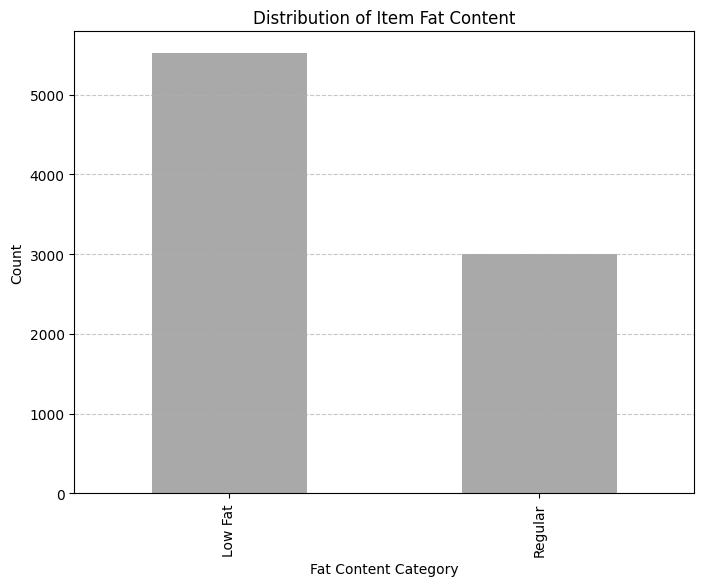

In [32]:
fat_content_counts = df['Item_Fat_Content'].value_counts()
print(f'fat content counts is: \n{fat_content_counts}')
# Create a bar plot
plt.figure(figsize=(8, 6))
fat_content_counts.plot(kind='bar', color='darkgray')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Distribution of Item Fat Content')
plt.xlabel('Fat Content Category')
plt.ylabel('Count')

plt.show()


The distribution of item fat content categories is: "Low Fat" (5089), "Regular" (2889), "LF" (316), "reg" (117), and "low fat" (112).

## 4. Is there a correlation between item visibility and sales?


In [33]:
correlation= df['Item_Visibility'].corr(df['Item_Outlet_Sales'])
print(f"The correlation between item visibility and sales is {correlation:.4f}")

The correlation between item visibility and sales is -0.1286


## 5. Which item type has the highest average price (Item_MRP)?


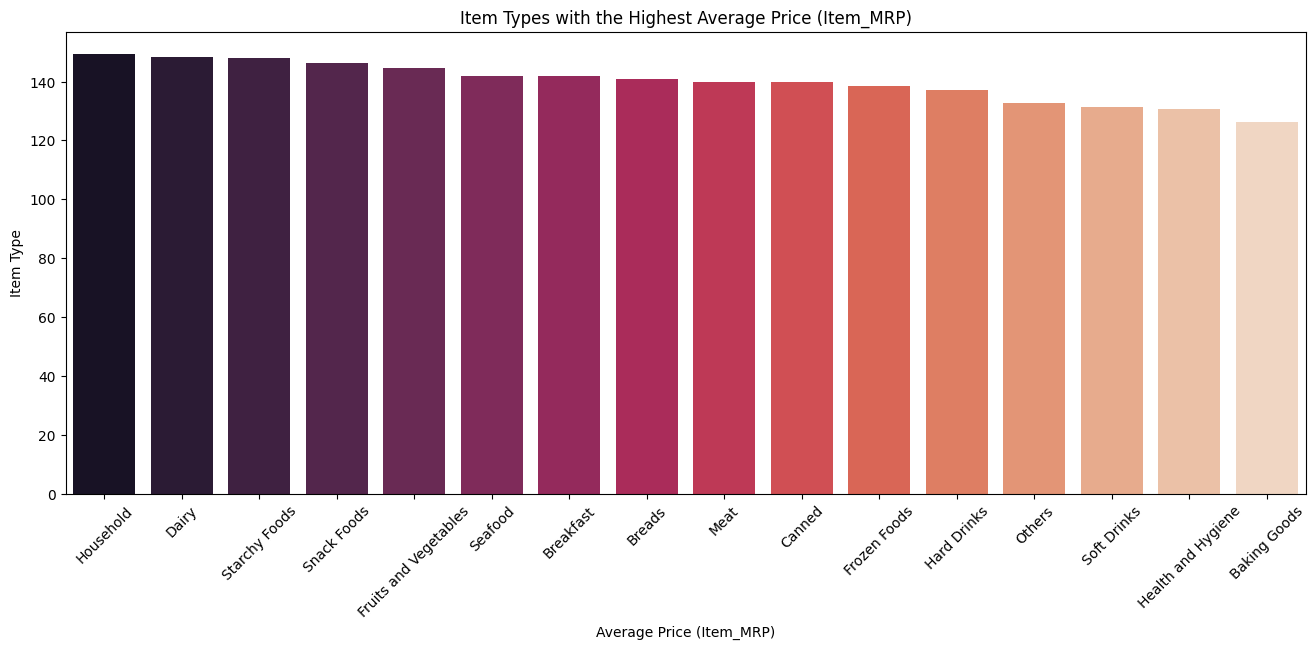

In [34]:
high_item_price= df.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)
# high_item_price

# visulaize
plt.figure(figsize=(16, 6))
sns.barplot(y=high_item_price.values, x=high_item_price.index, palette='rocket')

plt.title('Item Types with the Highest Average Price (Item_MRP)')
plt.xlabel('Average Price (Item_MRP)')
plt.ylabel('Item Type')
plt.xticks(rotation=45)

plt.show()


## 6. How many unique outlets are there, and what are their establishment years?


In [35]:
unique_outlet= df[['Outlet_Identifier', 'Outlet_Establishment_Year']].drop_duplicates()
unique_outlet

,Outlet_Identifier,Outlet_Establishment_Year
0,OUT049,1999
1,OUT018,2009
3,OUT010,1998
4,OUT013,1987
7,OUT027,1985
8,OUT045,2002
9,OUT017,2007
11,OUT046,1997
19,OUT035,2004
23,OUT019,1985


In [36]:
for index, row in unique_outlet.iterrows():
    print(f"Outlet Identifier: {row['Outlet_Identifier']}, Establishment Year: {row['Outlet_Establishment_Year']}")


Outlet Identifier: OUT049, Establishment Year: 1999
Outlet Identifier: OUT018, Establishment Year: 2009
Outlet Identifier: OUT010, Establishment Year: 1998
Outlet Identifier: OUT013, Establishment Year: 1987
Outlet Identifier: OUT027, Establishment Year: 1985
Outlet Identifier: OUT045, Establishment Year: 2002
Outlet Identifier: OUT017, Establishment Year: 2007
Outlet Identifier: OUT046, Establishment Year: 1997
Outlet Identifier: OUT035, Establishment Year: 2004
Outlet Identifier: OUT019, Establishment Year: 1985


## 7. What is the distribution of outlet sizes among the stores?


In [37]:

# Calculate the count of each outlet size category
outlet_size_counts = df['Outlet_Size'].value_counts()
outlet_size_counts

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

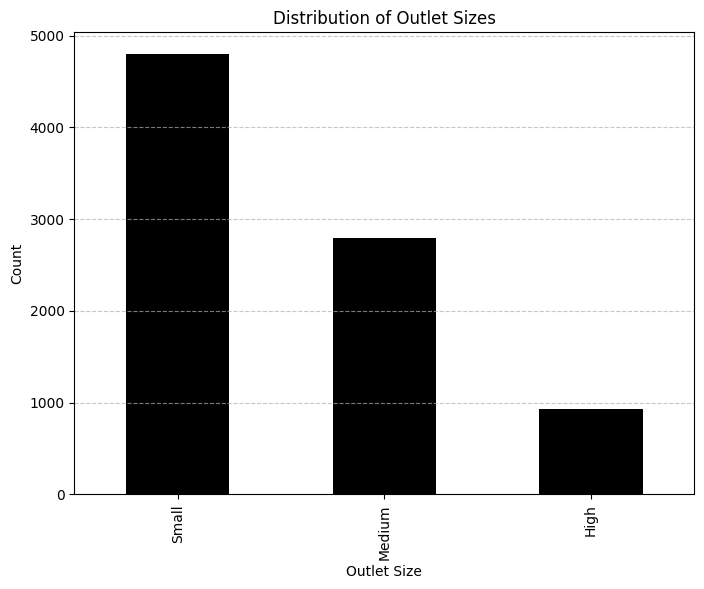

In [38]:
# Create a bar plot
plt.figure(figsize=(8, 6))
outlet_size_counts.plot(kind='bar', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Distribution of Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Count')

plt.show()


## 8. Which outlet location type is the most common?


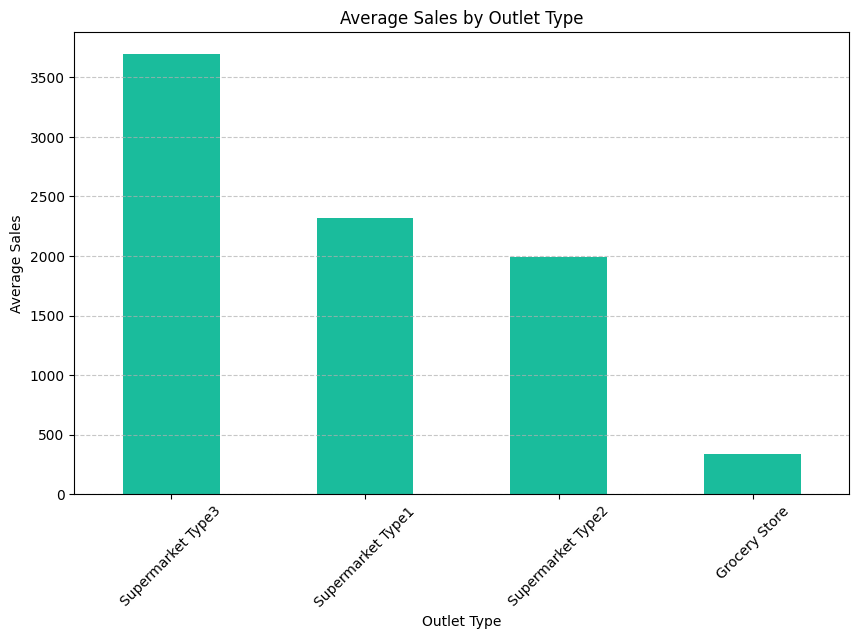

In [39]:
average_sales_by_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
average_sales_by_outlet_type.plot(kind='bar', color='#1ABC9C')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')

plt.xticks(rotation=45)

plt.show()


## 9. Are there any outliers in the Item_Outlet_Sales column?


In [40]:
# Calculate the IQR (Interquartile Range) for 'Item_Outlet_Sales'
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
IQR

2267.049

In [41]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers in 'Item_Outlet_Sales'
outliers = df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)]

# Print the number of outliers and the outlier values
num_outliers = len(outliers)
print(f"There are {num_outliers} outliers in the 'Item_Outlet_Sales' column.")
if num_outliers > 0:
    print("Outlier values:")
    print(outliers['Item_Outlet_Sales'])

There are 186 outliers in the 'Item_Outlet_Sales' column.
Outlier values:
43      6768.5228
130     7968.2944
132     6976.2524
145     7370.4060
203     6704.6060
          ...    
8245    7549.5062
8329    6630.0364
8350    7240.5750
8447    7588.1226
8510    7182.6504
Name: Item_Outlet_Sales, Length: 186, dtype: float64


## 10. How does item fat content relate to item sales?


In [42]:
avg_fat_sales= df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
avg_fat_sales.values

array([2157.71153399, 2224.56117013])

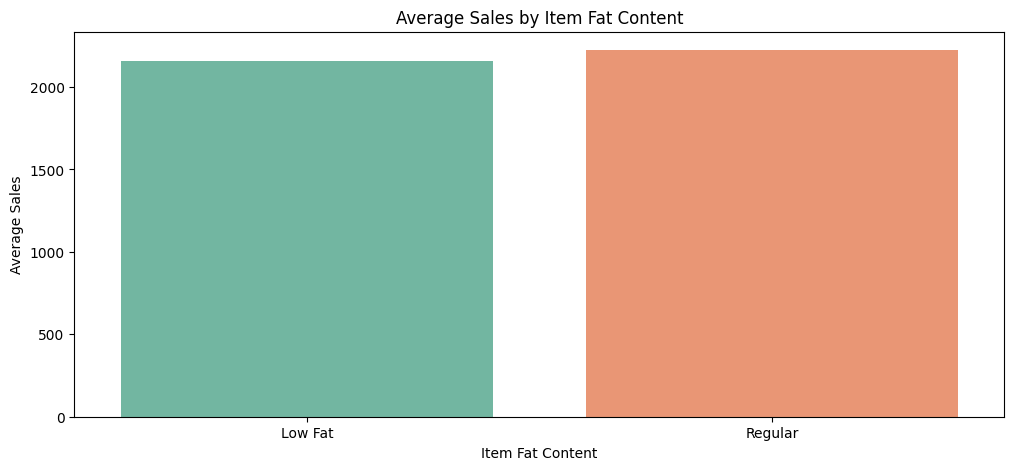

In [43]:
plt.figure(figsize=(12,5))
sns.barplot(x=avg_fat_sales.index, y=avg_fat_sales.values, palette='Set2')

plt.title('Average Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Average Sales')

plt.show()


## 11. How does the establishment year of outlets relate to their sales?


In [44]:
avg_year_sales= df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()
avg_year_sales


Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

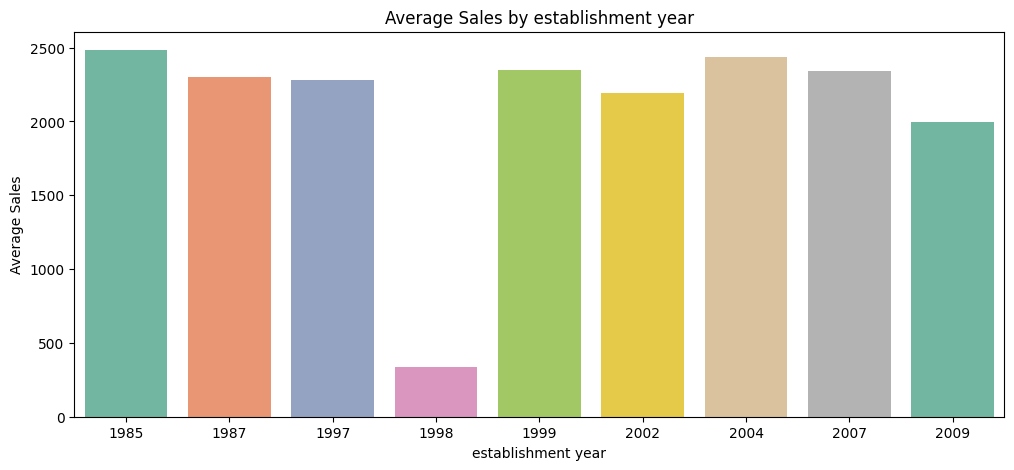

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(x=avg_year_sales.index, y=avg_year_sales.values, palette='Set2')

plt.title('Average Sales by establishment year')
plt.xlabel('establishment year')
plt.ylabel('Average Sales')

plt.show()


## 12. What is the total sales for each outlet?


In [46]:
total_sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
total_sales_by_outlet

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT019,1.796941e+05
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
7,OUT045,2.036725e+06
8,OUT046,2.118395e+06
9,OUT049,2.183970e+06


count    1.000000e+01
mean     1.859113e+06
std      9.833327e+05
min      1.796941e+05
25%      1.898048e+06
50%      2.130529e+06
75%      2.179844e+06
max      3.453926e+06
Name: Item_Outlet_Sales, dtype: float64


<Axes: >

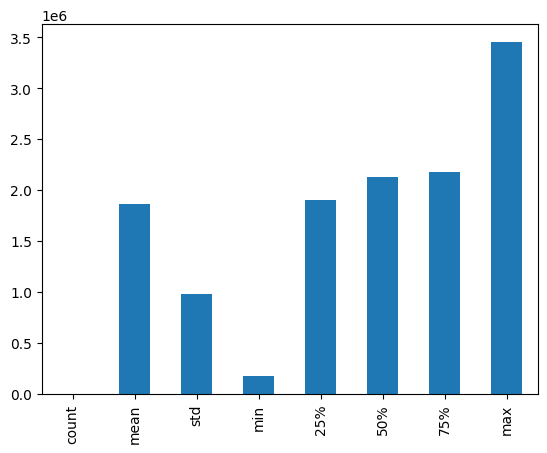

In [47]:
sales_stats = total_sales_by_outlet['Item_Outlet_Sales'].describe()
print(sales_stats)
sales_stats.plot(kind='bar')

<Axes: >

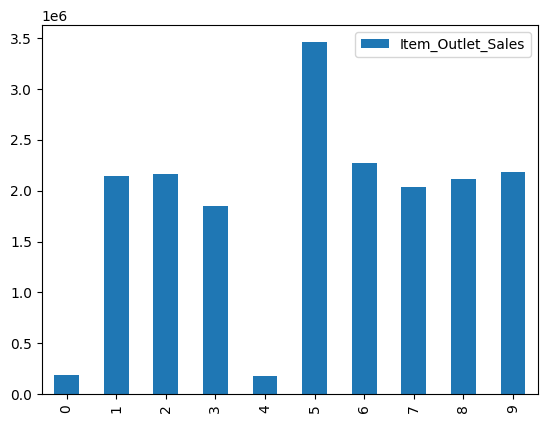

In [48]:
total_sales_by_outlet.plot(kind='bar')

## 13. How does the total sales vary by outlet location type?


In [49]:
total_sales_by_loc= df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
total_sales_by_loc

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

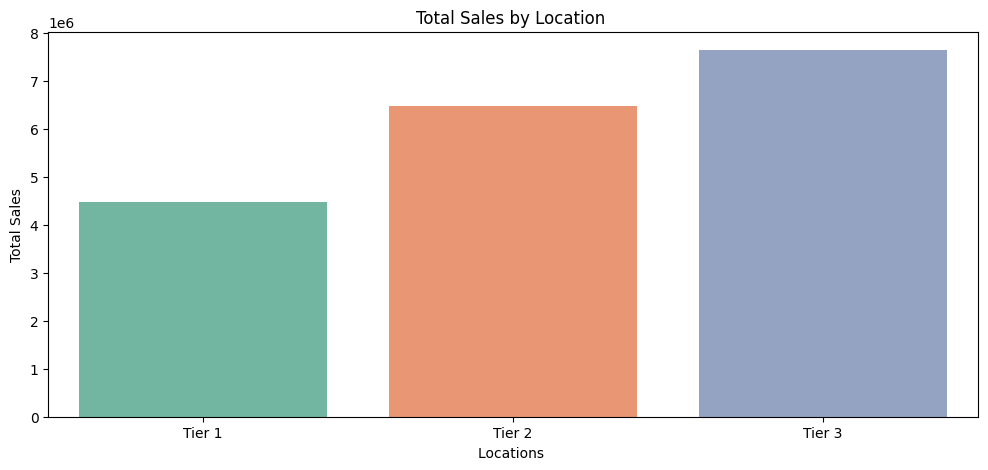

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(x=total_sales_by_loc.index, y=total_sales_by_loc.values, palette='Set2')

plt.title('Total Sales by Location ')
plt.xlabel('Locations ')
plt.ylabel('Total Sales')

plt.show()


## 14. Which outlet has the highest and lowest total sales?


In [51]:
total_sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
total_sales_by_outlet

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT019,1.796941e+05
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
7,OUT045,2.036725e+06
8,OUT046,2.118395e+06
9,OUT049,2.183970e+06


In [52]:
highest_sales_outlet = total_sales_by_outlet.sort_values(by='Item_Outlet_Sales', ascending=False).iloc[0]
lowest_sales_outlet = total_sales_by_outlet.sort_values(by='Item_Outlet_Sales', ascending=False ).iloc[0]

print(f"The outlet with the highest total sales is '{highest_sales_outlet['Outlet_Identifier']}' with total sales of {highest_sales_outlet['Item_Outlet_Sales']:.2f} \n")
print(f"The outlet with the lowest total sales is '{lowest_sales_outlet['Outlet_Identifier']}' with total sales of {lowest_sales_outlet['Item_Outlet_Sales']:.2f}")


The outlet with the highest total sales is 'OUT027' with total sales of 3453926.05 

The outlet with the lowest total sales is 'OUT027' with total sales of 3453926.05


## 15. What is the average sales for each item type?

In [53]:
average_sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index()

# Rename the columns for clarity
average_sales_by_item_type.columns = ['Item_Type', 'Average_Sales']

average_sales_by_item_type


,Item_Type,Average_Sales
0,Baking Goods,1952.971207
1,Breads,2204.132226
2,Breakfast,2111.808651
3,Canned,2225.194904
4,Dairy,2232.542597
5,Frozen Foods,2132.867744
6,Fruits and Vegetables,2289.009592
7,Hard Drinks,2139.221622
8,Health and Hygiene,2010.000265
9,Household,2258.784300


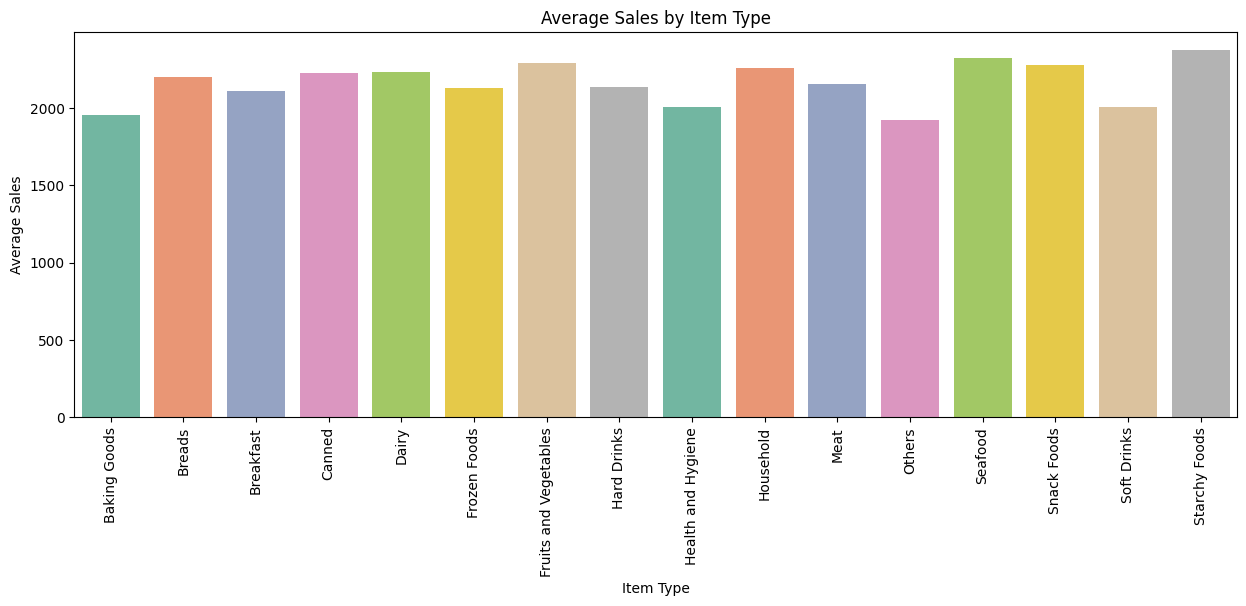

In [54]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Item_Type', y='Average_Sales', data=average_sales_by_item_type, palette='Set2')
plt.xticks(rotation=90)

plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')

plt.show()


# **Visualization all columns in my dataset**

* Plot histograms for 'Item_Weight', 'Item_MRP', and 'Item_Visibility' columns


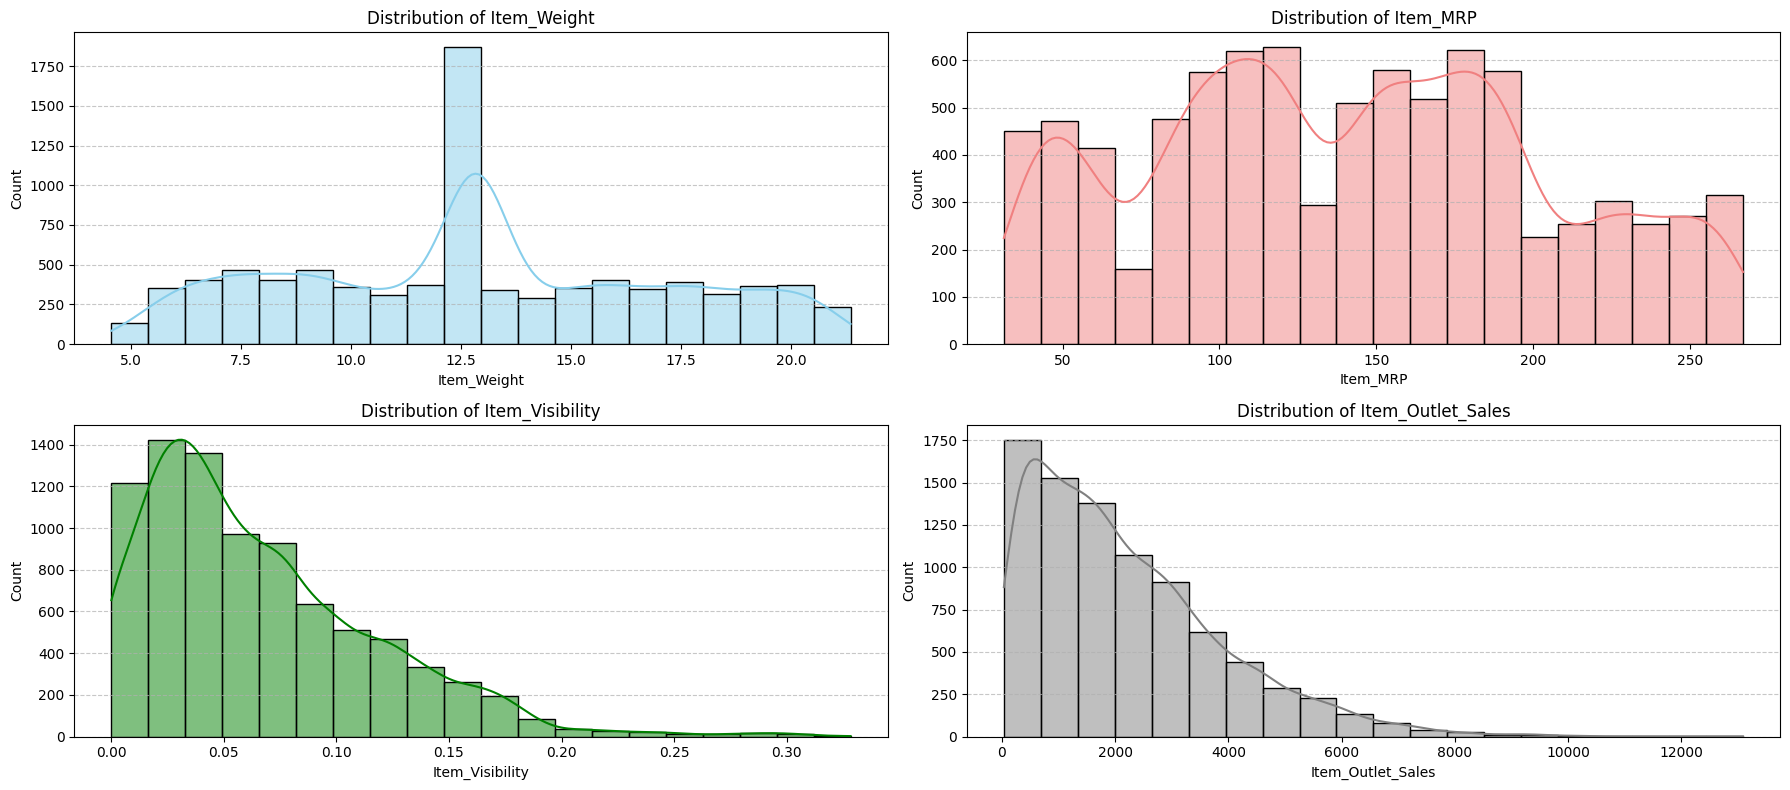

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))

# Plot histograms for 'Item_Weight', 'Item_MRP', and 'Item_Visibility' columns
sns.histplot(df['Item_Weight'], bins=20, color='skyblue', kde=True, ax=axes[0,0])
sns.histplot(df['Item_MRP'], bins=20, color='lightcoral', kde=True, ax=axes[0,1])
sns.histplot(df['Item_Visibility'], bins=20, color='green', kde=True, ax=axes[1,0])
sns.histplot(df['Item_Outlet_Sales'], bins=20, color='gray', kde=True, ax=axes[1,1])


# Set titles and labels for each subplot
axes[0, 0].set_title('Distribution of Item_Weight')
axes[0, 1].set_title('Distribution of Item_MRP')
axes[1, 0].set_title('Distribution of Item_Visibility')
axes[1, 1].set_title('Distribution of Item_Outlet_Sales')

axes[0, 0].set_xlabel('Item_Weight')
axes[0, 1].set_xlabel('Item_MRP')
axes[1, 0].set_xlabel('Item_Visibility')
axes[1, 1].set_xlabel('Item_Outlet_Sales')

# Add gridlines for clarity
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()

= **for this visualization:**
1. **Item Weight**: Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

2. **Item Visibility**: from the above graph we can observe that the Item Visibility feature is positively skewed

3. **Item MRP**: From the above graph, we can observe that we have suitable number of products for 50 MRP, 100 MRP, and 200 MRP & then we have fewer products, hence we have more products in the range of 100 MRP - 180 MRP

4. **Item Outlet Sales**: Hence from the above graph we can observe that the Item Outlet Sales feature is positively skewed


In [56]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

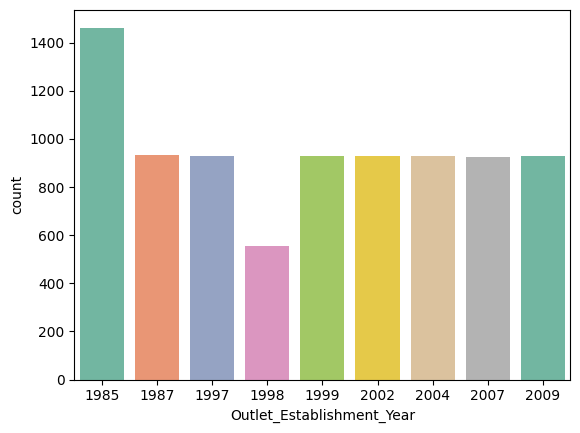

In [57]:
sns.countplot(x='Outlet_Establishment_Year', data=df, palette='Set2')
plt.show()

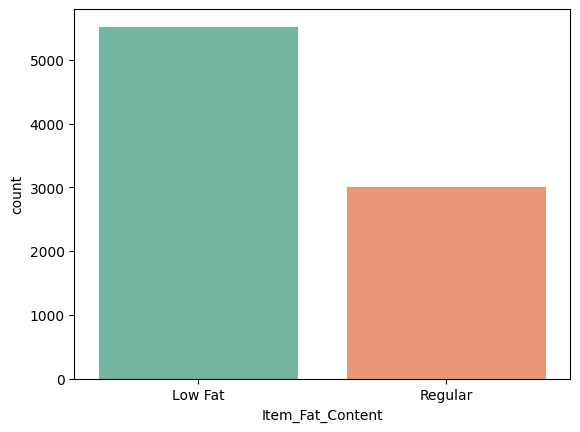

In [58]:
sns.countplot(x='Item_Fat_Content', data=df, palette='Set2')
plt.show()

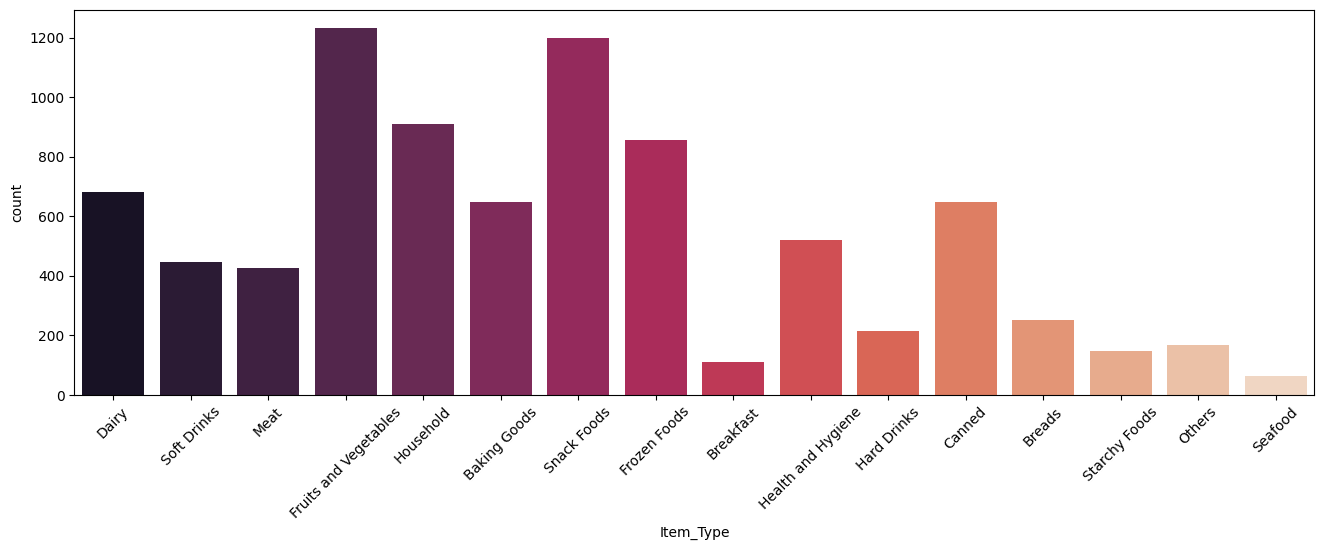

In [59]:
plt.figure(figsize=(16,5))
sns.countplot(x='Item_Type', data=df, palette='rocket')
plt.xticks(rotation=45)
plt.show()

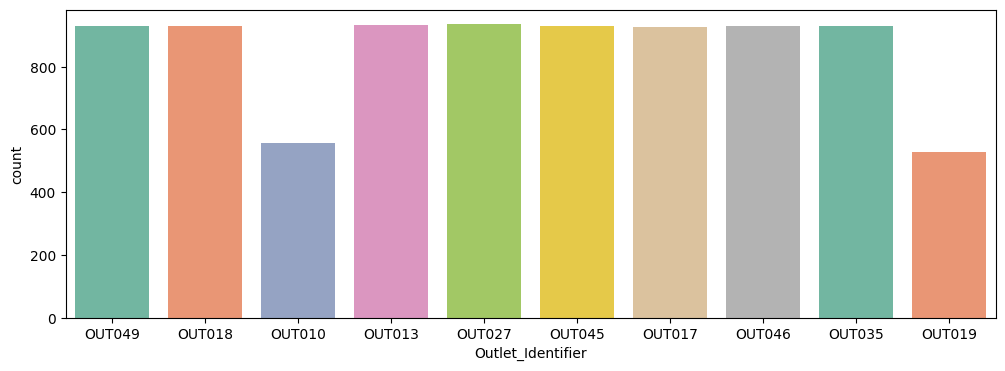

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(x='Outlet_Identifier', data=df, palette='Set2')
plt.show()

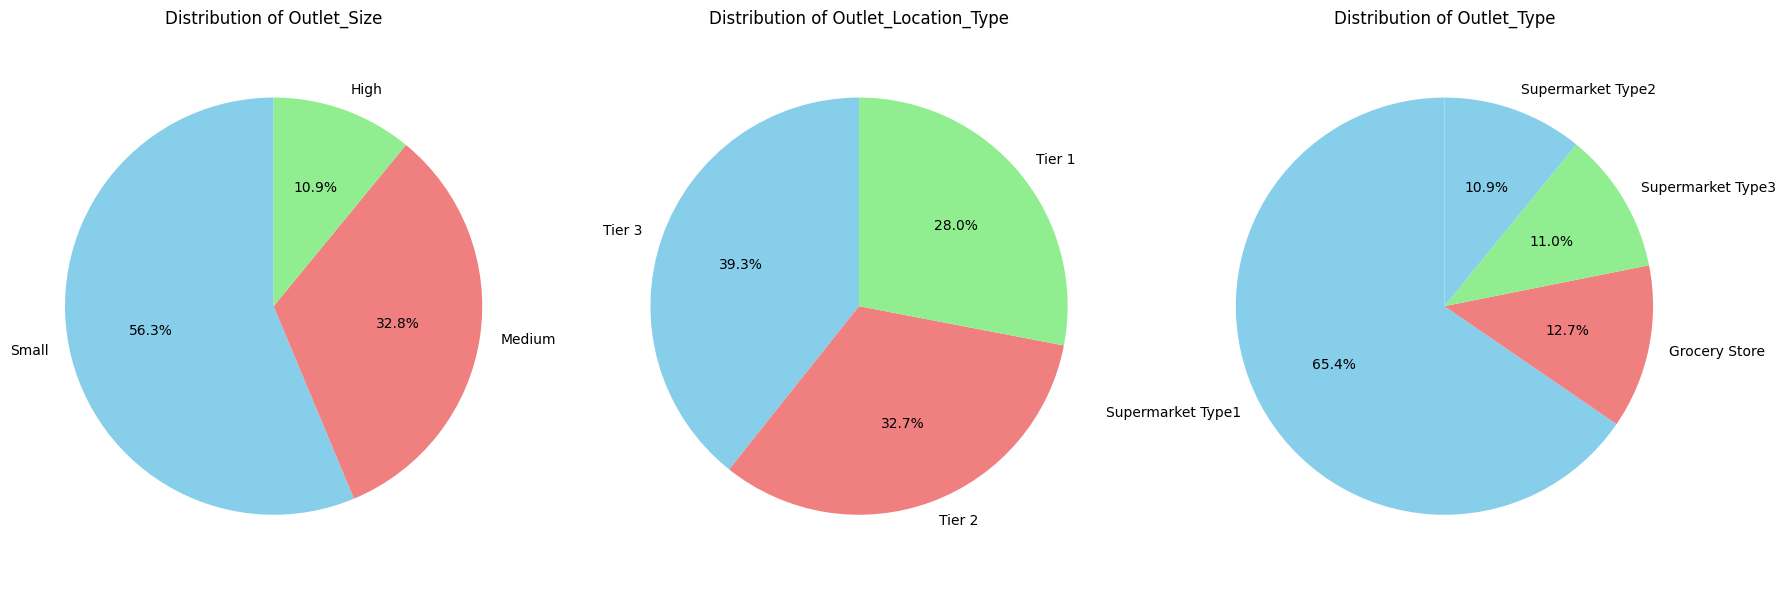

In [61]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))

columns_to_plot = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    category_counts = df[column].value_counts()
    labels = category_counts.index
    sizes = category_counts.values
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Distribution of {column}')

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


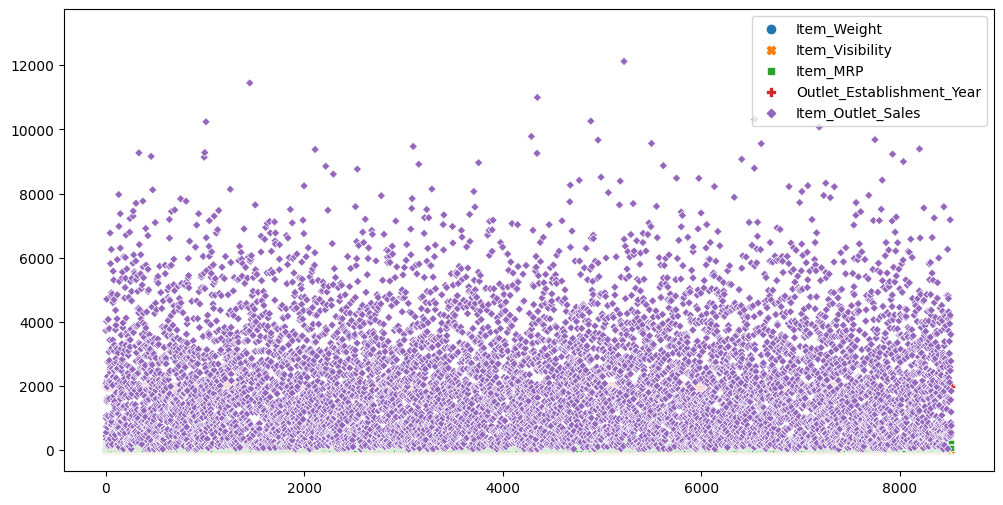

In [62]:
plt.figure(figsize=(12,6))
sns.scatterplot(df)
plt.show()

# **Machine learning**


In [63]:
# import nessasry LIBRARIES
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import xgboost as xgb


## **PREPROCESSING**



## **Encoder**

In [64]:
encoder = LabelEncoder()

In [65]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier','Item_Identifier']

for i in var_mod:
    df[i] = le.fit_transform(df[i])

for i in var_mod:
    test_df[i] = le.fit_transform(test_df[i])


In [66]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [67]:
df['Outlet_Establishment_Year'].max()

2009

## Scaling labeleling columns

In [68]:
# Initialize the StandardScaler Item_MRP
scaler = MinMaxScaler()

# Define the columns that need to be scaled (excluding the target variable)
columns_to_scale = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type', 'Outlet_Identifier', 'Item_Identifier','Item_MRP','Item_Weight','Outlet_Establishment_Year']


In [69]:

# Scale the features in your training data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Scale the features in your testing data
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])


In [70]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.016047,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,3735.1380
1,0.005135,0.081274,1.0,0.019278,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,443.4228
2,0.424904,0.770765,0.0,0.016760,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,2097.2700
3,0.719512,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.541667,1.0,1.0,0.000000,732.3800
4,0.832478,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,994.7052


In [71]:
df['Outlet_Establishment_Year'].max()

1.0

## Feature Selection

In [72]:
df = df.drop(['Item_Identifier','Item_Visibility'],axis=1)
test_df= test_df.drop(['Item_Identifier','Item_Visibility'],axis=1)


In [73]:
print(df.shape)
print(test_df.shape)

(8523, 10)
(5681, 9)


## Spliting the dataset into Feature and Target

In [74]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [75]:
print(f'shape of feature is :{X.shape}')
print(f'shape of target is :{y.shape}')


shape of feature is :(8523, 9)
shape of target is :(8523,)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [77]:
print(f'shape of X_train is :{X_train.shape}')
print(f'shape of X_test is :{X_test.shape}')
print(f'shape of y_train is :{y_train.shape}')
print(f'shape of y_test is :{y_test.shape}')


shape of X_train is :(6818, 9)
shape of X_test is :(1705, 9)
shape of y_train is :(6818,)
shape of y_test is :(1705,)


In [78]:
features= X_train.columns
features

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# **Apply ML Models**

In [79]:
LR = LinearRegression()
LR.fit(X_train, y_train)

# Get the coefficients and their corresponding feature names
coef2 = pd.Series(LR.coef_, index=features).sort_values()

# Print the coefficients
print(coef2)


Outlet_Size                  -302.519904
Outlet_Location_Type         -207.240163
Item_Type                     -21.718603
Item_Weight                    12.659039
Item_Fat_Content               44.978438
Outlet_Establishment_Year      79.152062
Outlet_Identifier             536.408037
Outlet_Type                  2558.802529
Item_MRP                     3646.893621
dtype: float64


<Axes: >

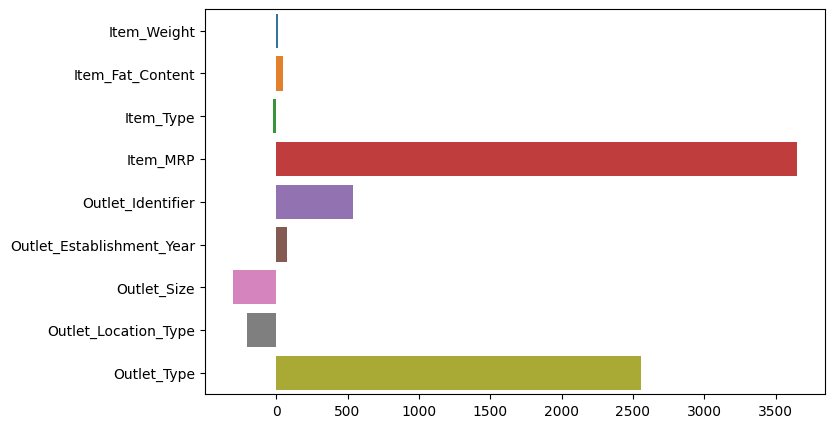

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(x= LR.coef_, y=features)


## 1. Linear Regression

In [81]:
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [82]:
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()
coef2

Outlet_Size                  -302.519904
Outlet_Location_Type         -207.240163
Item_Type                     -21.718603
Item_Weight                    12.659039
Item_Fat_Content               44.978438
Outlet_Establishment_Year      79.152062
Outlet_Identifier             536.408037
Outlet_Type                  2558.802529
Item_MRP                     3646.893621
dtype: float64

In [83]:
r2_sales = metrics.r2_score(y_test, y_pred)
print('R Squared value = ', r2_sales)

R Squared value =  0.5130443947809729


In [84]:
# Evaluate the model
r2_LR = r2_score(y_test,y_pred)
mse_LR = mean_squared_error(y_test,y_pred)
mae_LR = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R-squared (R2) score: {r2_LR:.2f}')
print(f'Mean Squared Error (MSE): {mse_LR:.2f}')
print(f'Mean Absolute Error (MAE): {mae_LR:.2f}')


R-squared (R2) score: 0.51
Mean Squared Error (MSE): 1445484.76
Mean Absolute Error (MAE): 899.43


## **SVM**

In [85]:
# ## note i am trying many times with differnt parameters

# # Define the parameter grid for grid search
# param_grid = {
#     'kernel': ['linear'],
#     'C': [10,100,200 ],
#     'epsilon': [0.2,0.22,0.25,0.28]
# }

# # Create the SVR model
# svr = SVR()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print(f'Best parameters: {best_params}')


**in grid search i found best parameters is**  
* Fitting 3 folds for each of 12 candidates, totalling 36 fits
* Best parameters: {'C': 200, 'epsilon': 0.2, 'kernel': 'linear'}


In [134]:
svr = SVR(C=400, epsilon=0.2,kernel='linear')
svr.fit(X_train,y_train)

SVR(C=400, epsilon=0.2, kernel='linear')

In [135]:
svr_pred=svr.predict(X_test)

In [136]:
# Evaluate the model
r2_SVR = r2_score(y_test, svr_pred)
mse_SVR = mean_squared_error(y_test, svr_pred)
mae_SVR = mean_absolute_error(y_test, svr_pred)

# Print the evaluation metrics
print(f'R-squared (R2) score: {r2_SVR:.3f}')
print(f'Mean Squared Error (MSE): {mse_SVR:.2f}')
print(f'Mean Absolute Error (MAE): {mae_SVR:.2f}')


R-squared (R2) score: 0.500
Mean Squared Error (MSE): 1483936.24
Mean Absolute Error (MAE): 895.25


## XGBRegressor


In [89]:
# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [ 0.1],
#     'max_depth': [3, 4],
#     'min_child_weight': [1, 3],
#     'gamma': [0, 0.1, 0.2]
# }


# # Create the XGBoost model
# xgb_model = xgb.XGBRegressor(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# # Fit the grid search to your training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# print(f'Best Parameters: {best_params}')


**Best params for XGB**
* Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}



In [90]:
regressor = XGBRegressor(gamma=0 ,learning_rate=0.1,max_depth=3, min_child_weight=1, n_estimators=100 )
regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [91]:
# make predection on X_test
XGBsales_prediction = regressor.predict(X_test)


In [92]:
# Evaluate the model
r2_xgb = r2_score(y_test, XGBsales_prediction)
mse_xgb = mean_squared_error(y_test, XGBsales_prediction)
mae_xgb = mean_absolute_error(y_test, XGBsales_prediction)

# Print the evaluation metrics
print(f'R-squared (R2) score: {r2_xgb:.2f}')
print(f'Mean Squared Error (MSE): {mse_xgb:.2f}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')


R-squared (R2) score: 0.60
Mean Squared Error (MSE): 1183292.05
Mean Absolute Error (MAE): 759.32


## Random Forest regressor

In [93]:
# # Create a Random Forest Regressor
# rf_model = RandomForestRegressor(random_state=42)

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# # Fit the grid search to your training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# print(f'Best Parameters: {best_params}')


* Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [94]:
rf_model = RandomForestRegressor(max_depth=10,max_features='sqrt', min_samples_leaf=4,min_samples_split=10, n_estimators=200)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200)

In [95]:
# make predection on X_test
RF_sales_prediction = rf_model.predict(X_test)


In [96]:
# Evaluate the model
r2_RF = r2_score(y_test, RF_sales_prediction)
mse_RF = mean_squared_error(y_test, RF_sales_prediction)
mae_Rf = mean_absolute_error(y_test, RF_sales_prediction)

# Print the evaluation metrics
print(f'R-squared (R2) score: {r2_RF:.3f}')
print(f'Mean Squared Error (MSE): {mse_RF:.2f}')
print(f'Mean Absolute Error (MAE): {mae_Rf:.2f}')


R-squared (R2) score: 0.603
Mean Squared Error (MSE): 1178199.24
Mean Absolute Error (MAE): 758.65


## **Stacking**
* To improve machine learning accuracy, I'll use stacking many models together

In [97]:
from sklearn.ensemble import StackingRegressor

In [137]:
# Define the base models
base_models = [
    ('rf1', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf2', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf3', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf4', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf5', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf6', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf7', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf8', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf9', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf10', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),
    ('rf11', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=200)),

    ('xgb1', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb2', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb3', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb4', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb5', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb6', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb7', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb8', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb9', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb10', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),
    ('xgb11', XGBRegressor(gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100)),


    ('svr1', SVR(C=300, epsilon=0.2, kernel='linear')),
    ('svr2', SVR(C=300, epsilon=0.2, kernel='linear')),
    ('svr3', SVR(C=300, epsilon=0.2, kernel='linear')),
    ('svr4', SVR(C=300, epsilon=0.2, kernel='linear')),
    ('svr5', SVR(C=300, epsilon=0.2, kernel='linear')),
    ('svr6', SVR(C=300, epsilon=0.2, kernel='linear')),
    ('svr7', SVR(C=300, epsilon=0.2, kernel='linear'))



]


In [138]:
# Define the meta-regressor
meta_regressor = RandomForestRegressor(random_state=42)

# Create the stacking ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_regressor)


In [139]:
# Train the stacking model on your data
stacking_model.fit(X_train, y_train)


StackingRegressor(estimators=[('rf1',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=200)),
                              ('rf2',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=200)),
                              ('rf3',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_leaf...
                               SVR(C=300, epsilon=0.2, kernel='linear')),
                              ('svr2',
                               SVR(C=300, epsilon=0.2, kernel='linear')),
                              ('svr3',
                               SVR(C=300, epsilon=0.2, kernel='linear')),
                              ('svr4',
                               SVR(C=300, epsilon=0.2, kernel='linear')),
                              ('svr5',
                               SVR(C=300, epsilon=0.2, kernel='linear')),
                              ('svr6',
                               SVR(C=300, epsilon=0.2, kernel='linear')),
                              ('svr7',
                               SVR(C=300, epsilon=0.2, kernel='linear'))],
                  final_estimator=RandomForestRegressor(random_state=42))

In [140]:
# Make predictions using the stacking model
y_pred = stacking_model.predict(X_test)


In [142]:
# Make predictions using the stacking model
stacking_sales_prediction = stacking_model.predict(X_test)

# Evaluate the stacking model's performance
r2_stacking = r2_score(y_test, stacking_sales_prediction)
mse_stacking = mean_squared_error(y_test, stacking_sales_prediction)
mae_stacking = mean_absolute_error(y_test, stacking_sales_prediction)

# Print the evaluation metrics for the stacking model
print(f'Stacking Model - R-squared (R2) score: {r2_stacking:.3f}')
print(f'Stacking Model - Mean Squared Error (MSE): {mse_stacking:.2f}')
print(f'Stacking Model - Mean Absolute Error (MAE): {mae_stacking:.2f}')


Stacking Model - R-squared (R2) score: 0.570
Stacking Model - Mean Squared Error (MSE): 1275835.43
Stacking Model - Mean Absolute Error (MAE): 792.91


# **Evaluation all models in one DataFrame**
* sorting by r2 score

In [143]:
# Create a dictionary to store the evaluation metrics
evaluation_metrics = {
    'Model': ['Linear Regression', 'SVM', 'XGBoost', 'Random Forest', 'Stacking'],
    'R2 Score': [r2_LR, r2_SVR, r2_xgb, r2_RF, r2_stacking],
    'Mean Squared Error': [mse_LR, mse_SVR, mse_xgb, mse_RF, mse_stacking],
    'Mean Absolute Error': [mae_LR, mae_SVR, mae_xgb, mae_Rf, mae_stacking]
}


In [144]:
# Create a DataFrame from the dictionary
evaluation_df = pd.DataFrame(evaluation_metrics)


In [145]:
# Sort the DataFrame by R2 Score in descending order
evaluation_df = evaluation_df.sort_values(by='R2 Score', ascending=False)
evaluation_df

,Model,R2 Score,Mean Squared Error,Mean Absolute Error
3,Random Forest,0.603088,1.178199e+06,758.646058
2,XGBoost,0.601372,1.183292e+06,759.321443
4,Stacking,0.570196,1.275835e+06,792.908233
0,Linear Regression,0.513044,1.445485e+06,899.429074
1,SVM,0.500091,1.483936e+06,895.249267
